<a href="https://colab.research.google.com/github/rlfwo93/machine-learning/blob/master/mnist_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

# mnist란 ?

- MNIST 데이터란 필기 숫자의 분류를 위한 학습 데이터 집합입니다. 즉, 이 데이터는 어지럽게 필기된 숫자가 어떤 숫자에 해당하는지 정확하게 맞추기 위한 학습을 위한 것입니다.

- 사이즈는 28x28의 크기를 가진다. 이미지의 값은 0 또는 1이다 (흑,백)

- 0 부터 9 까지의 숫자를 28x28 픽셀 크기의 이미지로 구성

-  1개의 레코드(1개의행 row)는 785개의 숫자로 구성
-  1열에는 정답이있다.
-  2열부터 마지막 열까지는 정답을 나타내는 이미지의 색을 나타내는 숫자 값들이 784개 연속으로 있다.

 * 흑백 이미지를 표현 할떄 숫자 0에 가까울 수록 검은색으로. 255에 가까울수록 하얀새으로 나타내는데 2열부터 마지막 열까지 나열된 숫자가 바로 이미지 색을 나타내는 정보.


In [ ]:
data = np.loadtxt("sample_data/mnist_train_small.csv", delimiter=",")
# delimiter는 CSV 파일이 뭘로 나누어져 있는지(\t, ' ', '+' 등)를 나타낸다
# delimniter= "," 는 ,를 기준으로 파일을 나뉘어준다.


In [ ]:
data

"""
 array([[6., 0., 0., ..., 0., 0., 0.],
       [5., 0., 0., ..., 0., 0., 0.],
       [7., 0., 0., ..., 0., 0., 0.],
       ...,
       [2., 0., 0., ..., 0., 0., 0.],
       [9., 0., 0., ..., 0., 0., 0.],
       [5., 0., 0., ..., 0., 0., 0.]])

       => 맨처음에 나오는 값이 정답이고 뒤에나오는 값들은 정답을 이루는 숫자들임.

       """

'\n array([[6., 0., 0., ..., 0., 0., 0.],\n       [5., 0., 0., ..., 0., 0., 0.],\n       [7., 0., 0., ..., 0., 0., 0.],\n       ...,\n       [2., 0., 0., ..., 0., 0., 0.],\n       [9., 0., 0., ..., 0., 0., 0.],\n       [5., 0., 0., ..., 0., 0., 0.]])\n\n       => 맨처음에 나오는 값이 정답이고 뒤에나오는 값들은 정답을 이루는 숫자들임.\n\n       '

In [ ]:
data.shape,type(data)

#((20000, 785) = 행렬을 나타냄, 
#numpy.ndarray) = 넘파이로 만든 배열.

((20000, 785), numpy.ndarray)

# Hand-written number images and target level
# data: images of hand-written numbers (28 X 28 pixels)
# target: numbers (0 ~ 9)

In [ ]:
data[:,0]  # target (hand-written numbers)

array([6., 5., 7., ..., 2., 9., 5.])

In [ ]:
data[-1,0]

5.0

In [ ]:
data[-5:,0]

array([0., 1., 2., 9., 5.])

In [ ]:
data[:,0].shape

(20000,)

In [ ]:
target = data[:,0] #data의 모든행 0번째 원소
target

array([6., 5., 7., ..., 2., 9., 5.])

In [ ]:
target[:5],target[-5:]

(array([6., 5., 7., 9., 5.]), array([0., 1., 2., 9., 5.]))

In [ ]:
ndata = data[:,1:]  # ndata (iamge of hand-written numbers), 784 pixels for each number
#첫번째값은 레이블이고, 뒤에있는 값들이 답을 구성하는 데이터이기떄문에 첫번째 값은 빼줌
print(ndata.shape) # 20000,784 
print("784 = {}".format(28*28)) # 784 픽셀인것을 알려줌
print(type(ndata)) # 넘파이의 배열 오브젝트

(20000, 784)
784 = 784
<class 'numpy.ndarray'>



# 행벡터(1X784)를 이미지 배열 (28X28)로 재구성

In [ ]:
ndata[0,0:]  # first number


array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,  24.,  67.,  67.,  18.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0., 13

In [ ]:
ndata[0,0:].shape, target[0]  # 첫번째 숫자는 6

((784,), 6.0)

In [ ]:
first_num = ndata[0,0:].reshape(28,28) # 맨 첫번째 행렬을 28x28로
first_num
print("first_num = {0}".format(first_num.size))
print(type(first_num))

first_num = 784
<class 'numpy.ndarray'>


In [ ]:
last_num = ndata[-1,0:].reshape(28,28) # 맨 마지막  행렬을 28x28로
last_num
print("last_num = {0}".format(last_num.size))
print(type(last_num))

last_num = 784
<class 'numpy.ndarray'>


# Matplotlib 

- matplotlib은 다양한 데이터를 많은 방법으로 도식화 할 수 있도록 하는 파이썬 라이브러리로써, 우리는 matplotlib의 pyplot을 이용하게 됩니다.

이는 mathworks에서 개발한 매트랩(MATLAB)과 비슷한 형태를 가지고 있습니다.

matplotlib을 이용하면 우리가 이전에 알아본 numpy나 pandas에서 사용되는 자료구조를 쉽게 시각화 할 수 있습니다.


In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
# %matplotlib inline 의 역할은 notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 해주는 것
# %pylab inline 또는 %matplotlib inline 을 실행하면 
#ipython 과 쥬피터 노트북에서 plt.show() 를 실행하지 않아도 되고 도표가 실행창에 포함된다



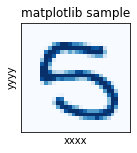

In [ ]:
plt.figure(figsize=(2,2)) # plt.figure(figsize=(x, y))를 입력하면 그림 크기를 결정

# figure = 그림의 단위
# figsize = figure의 크기를 결정

plt.imshow(last_num, cmap="Blues")

# plt.imshow 함수는 default 값이 color로 출력하게 되어있어서 내부적으로 변환이 이뤄지는것 
# 같은데, cmap(color map)형식 인자값을 다양하게 변경가능하며, 
# plt.imshow(cv_img, cmap='gray') 으로 변경하면 gray형식으로 출력되는것을 확인 


plt.grid(False) #무늬를 나타내주는 것 
plt.xticks([]) # x축 눈금을 몇으로 지정해줄지 설정
plt.title("matplotlib sample") # 제목을 설정
plt.xlabel("xxxx") # x축 라벨을 설정
plt.ylabel("yyyy") # y축 라벨을 설정
plt.yticks([]) #y축 눈금을 몇으로 할지 지정.
plt.show()

# show 명령은 시각화 명령을 실제로 차트로 렌더링(rendering)하고 마우스 움직임 등의 이벤트를 기다리라는 지시이다. 
# 주피터 노트북에서는 셀 단위로 플롯 명령을 자동 렌더링 해주므로 show 명령이 필요없지만
# 일반 파이썬 인터프리터로 가동되는 경우를 대비하여 항상 마지막에 실행하도록 한다.
# show 명령을 주면 마지막 플롯 명령으로부터 반환된 플롯 객체의 표현도 가려주는 효과가 있다.

In [ ]:

target[0], target[-1]   # check number

(6.0, 5.0)

# Show images of some numbers in train dataset

-  특정 레이블의 데이터값으로 답을 보여주는 함수

len(instances) = 1
images_per_row = 1
len(instances) - 1 = 0
images_per_row + 1 = 2
n_rows = 1 
n_empty = 0 
<class 'list'>
1
1
(28, 28)


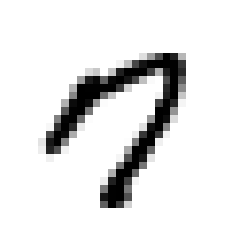

In [ ]:
# function plot_digits
# import numpy as np
# import matplotlib as mpl

test = ndata[2:3,:].reshape(1,784) #레이블7의 데이터가 있는 행렬

def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row) # 1  
    images = [instance.reshape(size,size) for instance in instances]
    # ndata[2:3,:].reshape(1,784) 을 (28,28) 로 바꿔줌
    n_rows = (len(instances) - 1) // images_per_row + 1 # 1
  
    print("len(instances) = {0}".format(len(instances) )) # 1
    print("images_per_row = {0}".format(images_per_row)) # 1   
    print("len(instances) - 1 = {0}".format(len(instances) - 1)) # 0
    print("images_per_row + 1 = {0}".format(images_per_row + 1)) # 2
    print("n_rows = {0} ".format(n_rows)) # 1

    row_images = []
    n_empty = n_rows * images_per_row - len(instances) # 0 

    print("n_empty = {0} ".format(n_empty)) # 0
    print(type(images))

    images.append(np.zeros((size, size * n_empty))) 
    
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        print(len(rimages))
        row_images.append(np.concatenate(rimages, axis=1))
        print(len(row_images))
    image_all = np.concatenate(row_images, axis=0)
    print(image_all.shape)
    plt.imshow(image_all, cmap = mpl.cm.binary, **options)
    plt.axis("off")

plot_digits(test)



In [ ]:
instances = np.array(range(0,764)).reshape(1,764)
print("len(instances) = {0}".format(len(instances)))
print("instances.size = {0}".format(instances.size))
print(last_num.size)

# len(instances)는  리스트의 길이를 알려줌 - 리스트가 중첩 리스트일 경우 가장 바깥 리스트의 길이를 알려줌
# arr.size는 arr에 몇개의 요소가 들어있는지를 알려줌 - 따라서 len()과 약간 다름


len(instances) = 1
instances.size = 764
784
1


In [ ]:
instances = np.array(range(0,764)).reshape(1,764)

for i in instances:
  print(i)


[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

# 키워드 파라미터 kwargs

 키워드 파라미터를 사용할 때는 매개변수 앞에 별 두 개(**)를 붙인다. 역시 이것도 예제로 알아보자. 먼저 다음과 같은 함수를 작성한다.

>>> def print_kwargs(**kwargs):
...     print(kwargs)
...
print_kwargs 함수는 매개변수 kwargs를 출력하는 함수이다. 이제 이 함수를 다음과 같이 사용해 보자.

>>> print_kwargs(a=1)
{'a': 1}
>>> print_kwargs(name='foo', age=3)
{'age': 3, 'name': 'foo'}
입력값 a=1 또는 name='foo', age=3이 모두 딕셔너리로 만들어져서 출력된다는 것을 확인할 수 있다. 즉 **kwargs처럼 매개변수 이름 앞에 **을 붙이면 매개변수 kwargs는 딕셔너리가 되고 모든 key=value 형태의 결괏값이 그 딕셔너리에 저장된다.

※ 여기에서 kwargs는 keyword arguments의 약자이며 args와 마찬가지로 관례적으로 사용한다.

In [ ]:
def print_kwargs(**kwargs):
     print(kwargs)

print_kwargs(a=1)
print_kwargs(진석 = "천재")


{'a': 1}
{'진석': '천재'}
{'w': 2}


# min함수
-  min(iterable)은 max 함수와 반대로, 인수로 반복 가능한 자료형을 입력받아 그 최솟값을 돌려주는 함수이다.

In [ ]:
a = min(3,5,2)
print("a = min(3,5,2) = {0}".format(a))

c=10
d=25
# b=30

f= min(c,d,b)

print("f = min({0},{1},{2}) = {3}".format(c,d,b,f))

a = min(3,5,2) = 2
f = min(10,25,30) = 10


In [ ]:
instances= [1,2,3,4,5]
images_per_row = 10
images_per_row = min(len(instances), images_per_row)
images_per_row

5

# 리스트 내포 for 문(리스트 안에서 for 문 사용하기)

In [ ]:
list = [1,2,3,4,5,6]
a = [i*i for i in list]
a

[1, 4, 9, 16, 25, 36]

In [ ]:
list = [3,4,5,6,7,8,9]
b = [num*3 for num in list]
b

[9, 12, 15, 18, 21, 24, 27]

In [ ]:
instances = np.array(range(0,784)).reshape(1,784)
size = 28
images = [instance.reshape(size,size) for instance in instances]
images

[array([[  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
          13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
          26,  27],
        [ 28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,
          41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,
          54,  55],
        [ 56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,
          69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,
          82,  83],
        [ 84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,
          97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109,
         110, 111],
        [112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124,
         125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137,
         138, 139],
        [140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152,
         153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165,
         166

In [ ]:
0//2

0